# TITANIC SURVIVAL PREDICTION

## Importing data and libraries

In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analysing the structure of the data

In [3]:
df.shape

(891, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


### Check missing values

In [48]:
missing_values = df.isnull().sum()
print(missing_values)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


### Handling Missing Values

In [12]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].str[0]  # Keep only first letter
df['Cabin']=df['Cabin'].fillna('U')  # 'U' for Unknown
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isnull().sum().sum()

0

## Dropping irrevalent columns

In [22]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## Changing datatype for Survived from integer to column

In [26]:
df["Survived"]=df["Survived"].astype("str")

### Feature Engineering

In [69]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
df.drop(columns=["SibSp","Parch"],inplace=True)

## Stats of the data

In [23]:
df.describe(include='object')

,Sex,Cabin,Embarked
count,891,891,891
unique,2,9,3
top,male,U,S
freq,577,687,646


In [24]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Target Oriented Analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

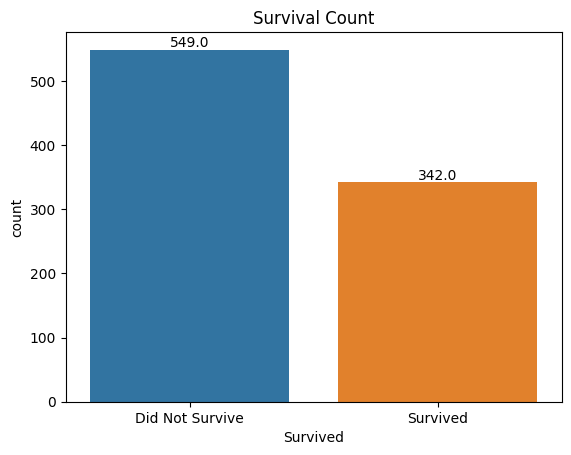

In [34]:
ax = sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(height), 
        xy=(p.get_x() + p.get_width() / 2, height), 
        ha='center', 
        va='bottom'
    )
ax.set_xticklabels(['Did Not Survive', 'Survived']) 
plt.show()

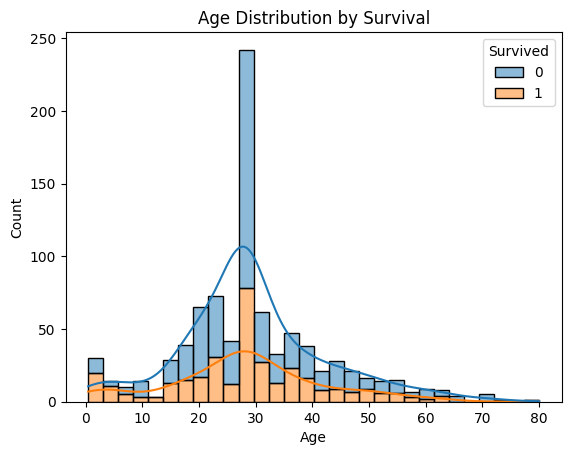

In [57]:
sns.histplot(data=df, x="Age", kde=True, hue="Survived", multiple="stack")
plt.title("Age Distribution by Survival")
plt.show()

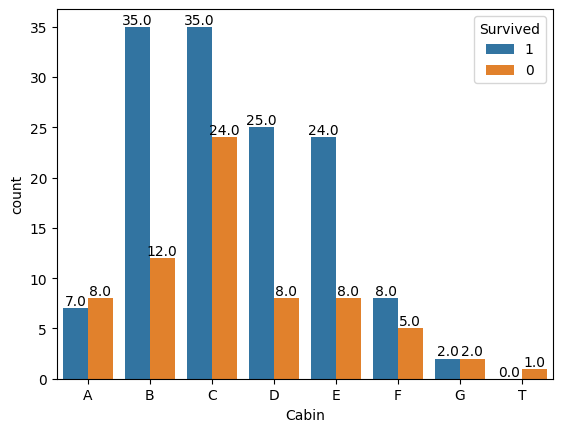

In [68]:
df_filtered=df[df["Cabin"]!="U"]
cabin_order = sorted(df_filtered['Cabin'].unique())
ax=sns.countplot(x="Cabin",data=df_filtered,hue="Survived",order=cabin_order)

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(height), 
        xy=(p.get_x() + p.get_width() / 2, height), 
        ha='center', 
        va='bottom'
    )
plt.show()

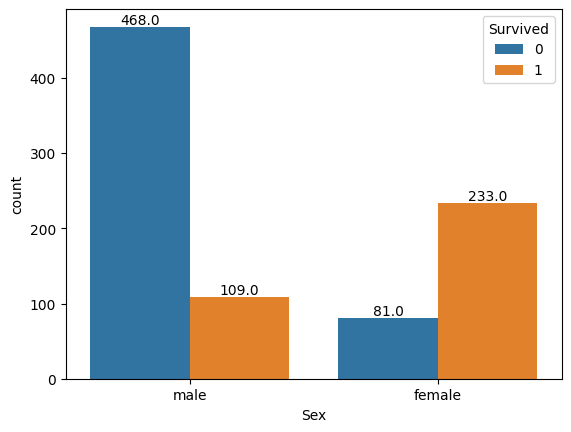

In [66]:
ax=sns.countplot(x="Sex",data=df,hue="Survived")
# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(height), 
        xy=(p.get_x() + p.get_width() / 2, height), 
        ha='center', 
        va='bottom'
    )
plt.show()

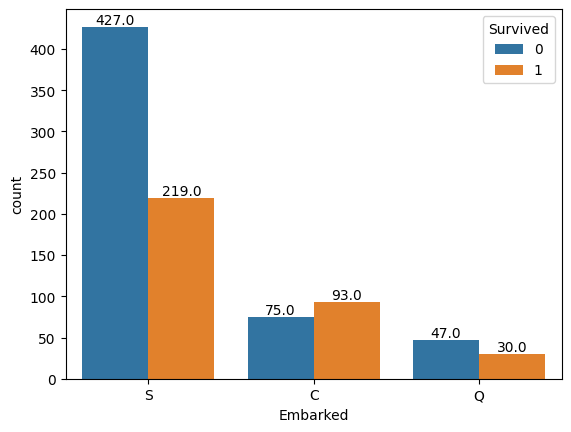

In [67]:
ax=sns.countplot(x="Embarked",data=df,hue="Survived")
# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(height), 
        xy=(p.get_x() + p.get_width() / 2, height), 
        ha='center', 
        va='bottom'
    )
plt.show()

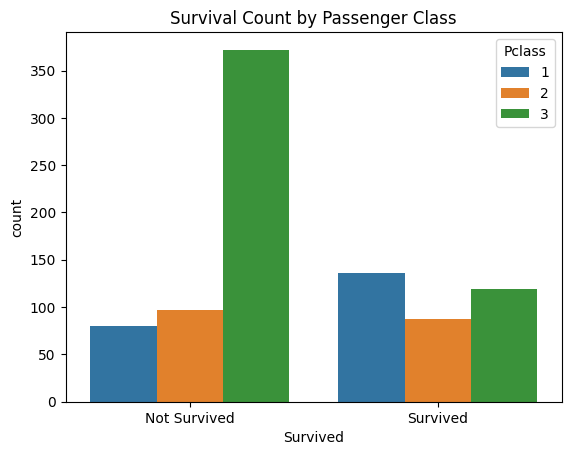

In [81]:
ax=sns.countplot(x="Survived", hue="Pclass", data=df)
plt.title("Survival Count by Passenger Class")
ax.set_xticklabels(["Not Survived","Survived"])
plt.show()


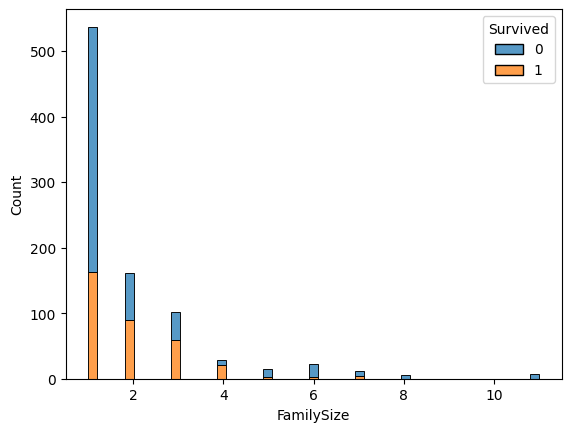

In [86]:
sns.histplot(x="FamilySize",data=df,hue="Survived",multiple="stack")
plt.show()


# Developing Model
**We use Random Forest Classifier because it is robust, handles both numerical and categorical features well, reduces overfitting by averaging multiple decision trees, and gives good accuracy on tabular datasets like Titanic with minimal preprocessing.**

## Preprocessing the data

Encode Survived and Sex (Label Encoding) 

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Survived'] = le.fit_transform(df['Survived'])  
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Cabin'] = le.fit_transform(df['Cabin'])

## Split data into features and target

In [95]:
from sklearn.model_selection import train_test_split
x = df.drop('Survived', axis=1)  # features
y = df['Survived']               # target

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Train a model

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,max_depth=6)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=500)

## Evaluate the model

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[93 12]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



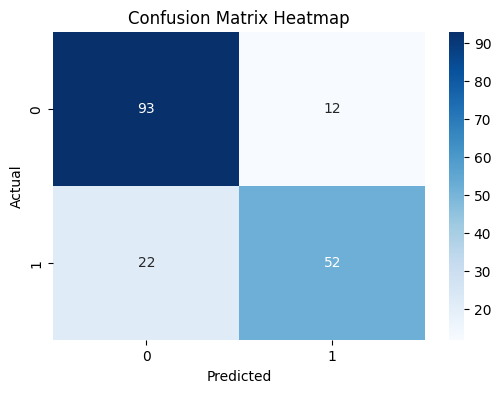

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rfc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [105]:
rfc.feature_importances_

array([0.07010844, 0.26663582, 0.24222875, 0.24461913, 0.07066362,
       0.03331197, 0.07243227])

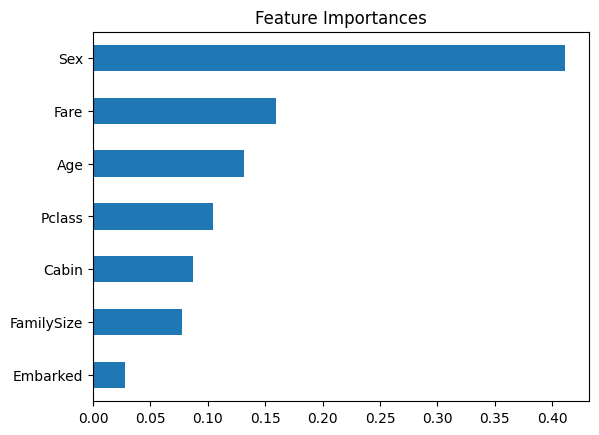

In [128]:
# Feature importance
importances = rfc.feature_importances_
# Create a Series with feature names
feat_imp = pd.Series(importances, index=x.columns)
# Sort and plot
feat_imp.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()

# Conclusion
The model exhibits fairly good overall performance, but there is a slight imbalance in its ability to predict each class (survived vs. not survived).

**Key Performance Indicators**
The overall performance metrics are:
- Accuracy: 0.81 (or 81.01%)
- Total Observations (Support): 179

1. **Analysis by Class (0: Did Not Survive, 1: Survived)**
Class 0 (Did Not Survive)
The model is strongest at predicting passengers who did not survive:

- True Negatives (TN): 93 (Correctly predicted not surviving).
- Recall (Sensitivity): 0.89. This means 89% of the passengers who actually did not survive were correctly identified by the model.
- Precision: 0.81. This means 81% of the passengers the model predicted would not survive actually did not survive.

2. **Class 1 (Survived)**
The model is slightly weaker at predicting passengers who survived:

- True Positives (TP): 52 (Correctly predicted surviving).
- Recall: 0.70. This is the main weakness; 30% of the passengers who actually survived were missed by the model (False Negatives - 22).
- Precision: 0.81. This means 81% of the passengers the model predicted would survive actually did survive, which is the same as the 'Did Not Survive' class.

**Conclusion**
The Titanic survival prediction model has an overall accuracy of 81%, which is generally a good result. However, the analysis of the Classification Report reveals a key area for improvement:
1. The model has a higher recall for Class 0 (Not Survived) (0.89) than for Class 1 (Survived) (0.70).
2. The 22 False Negatives (passengers who survived but were predicted not to) indicate that the model needs further tuning to better capture the characteristics of the survivors (Class 1) and reduce its miss rate for this group.